In [1]:
import numpy as np
import cv2
from skimage.metrics import structural_similarity as ssim
import matplotlib.pyplot as plt

In [2]:
BASELINE = 0.4  # in meters
FOCAL_LENGTH = 658  # in pixels

In [3]:
def compute_disparity(left_img, right_img):
    left_gray = cv2.cvtColor(left_img, cv2.IMREAD_GRAYSCALE)
    right_gray = cv2.cvtColor(right_img, cv2.IMREAD_GRAYSCALE)

    window_size = 5  # Size of the block matching window
    min_disp = 0     # Minimum disparity
    num_disp = 64    # Number of disparity levels (must be divisible by 16)
    block_size = window_size

    stereo = cv2.StereoSGBM_create(
    minDisparity=min_disp,
    numDisparities=num_disp,
    blockSize=block_size,
    P1=8 * 3 * window_size ** 2,  # Smoothness parameter 1
    P2=32 * 3 * window_size ** 2, # Smoothness parameter 2
    disp12MaxDiff=1,
    uniquenessRatio=10,
    speckleWindowSize=100,
    speckleRange=32
    )

    disparity = stereo.compute(left_gray, right_gray).astype(np.float32) / 16.0  # Normalize output
    
    disparity[disparity <= 0] = 1e-6  # Avoid division by zero
    return disparity

In [4]:
def compute_depth(disparity):
    return (BASELINE * FOCAL_LENGTH) / disparity

Disparity

(-0.5, 1919.5, 1199.5, -0.5)

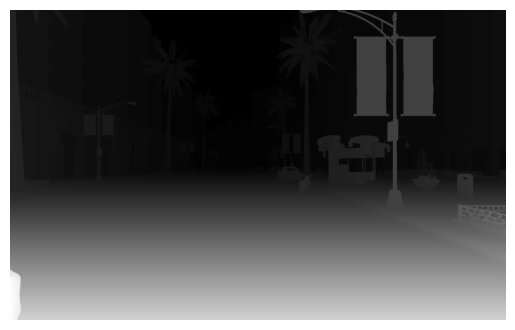

In [5]:
disp_true = cv2.imread('images/gt_disp/466.png', cv2.IMREAD_UNCHANGED)
plt.imshow(disp_true, cmap='gray')
plt.axis("off") 

In [6]:
left_img = cv2.imread(r"images\left\466.png")
right_img = cv2.imread(r"images\right\466.png")

disparity_map = compute_disparity(left_img, right_img)

(-0.5, 1919.5, 1199.5, -0.5)

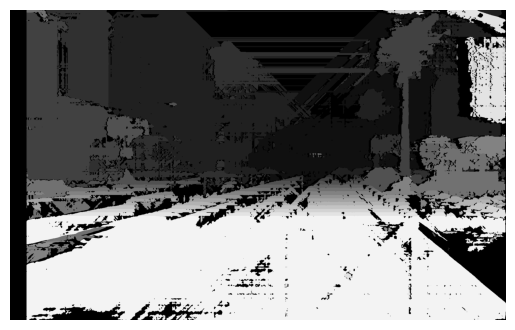

In [7]:
plt.imshow(disparity_map, cmap='gray')
plt.axis('off')

In [8]:
score, diff = ssim(disparity_map, disp_true, full=True, data_range=(np.max(disp_true) - np.min(disp_true)))
score

0.5835988525096149

(-0.5, 1919.5, 1199.5, -0.5)

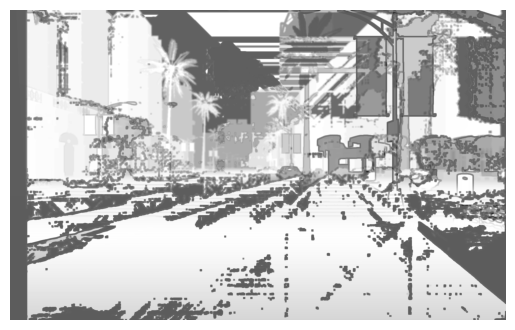

In [9]:
plt.imshow(diff, cmap='gray')
plt.axis('off')

Depth

(-0.5, 1919.5, 1199.5, -0.5)

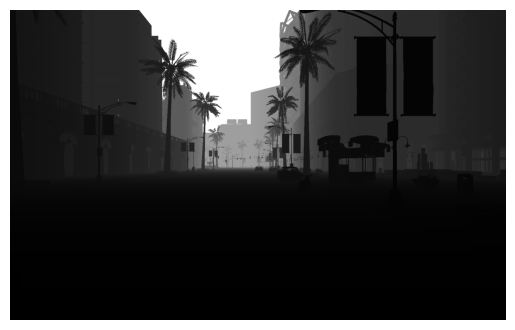

In [10]:
depth_true = cv2.imread('images/gt_depth/466.png', cv2.IMREAD_UNCHANGED)
plt.imshow(depth_true, cmap='gray')
plt.axis("off") 

In [11]:
depth_map = compute_depth(disparity_map)

(-0.5, 1919.5, 1199.5, -0.5)

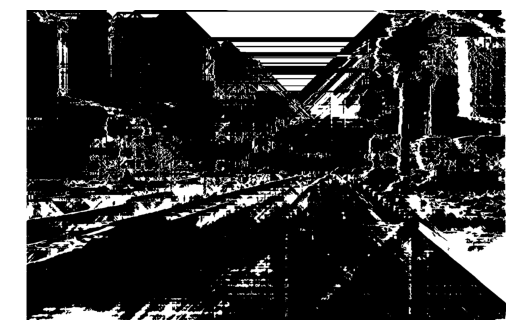

In [12]:
plt.imshow(depth_map, cmap='gray')
plt.axis('off')

In [13]:
score, diff = ssim(depth_map, depth_true, full=True, data_range=(np.max(depth_true) - np.min(depth_true)))
score

0.5744475300772707